In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ROSHAN\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('E:\Rohan\Datasets\Digital Cognition Internship\Marketing Mix Modelling\Advertising.csv')

In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df = df.iloc[:,1:]


In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Linear Regression

In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


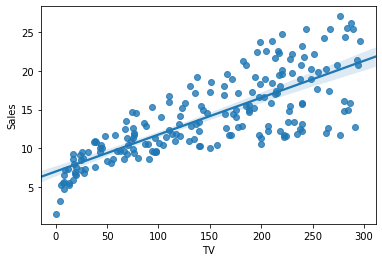

In [11]:
sns.regplot(df['TV'] , df['Sales'])

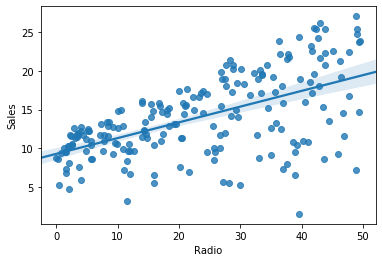

In [12]:
sns.regplot(df['Radio'] , df['Sales'])

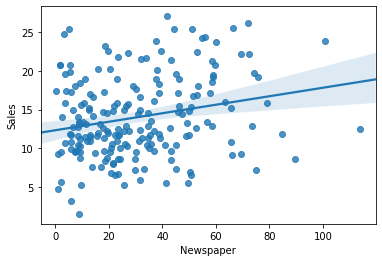

In [13]:
sns.regplot(df['Newspaper'] , df['Sales'])

In [14]:
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm

regr = skl_lm.LinearRegression()

X = df['TV'].values.reshape(-1,1)
y = df['Sales']

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127695
[0.04753664]


Y = B0 + B1*X

 Here, B0 (Intercept)          --> 7.0325
       B1 (Coefficient for TV) --> 0.0475

# Linear Regression For Each Of the Individual Parameters

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

est = smf.ols('Sales ~ Radio', df).fit()  #Ordinary Least Squares
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [16]:
est = smf.ols('Sales ~ Newspaper', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


# Multiple Linear Regression

In [17]:
X = df[['Radio', 'TV']]
y = df['Sales']

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.921099912405138


In [18]:
df[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


# Using Statsmodel

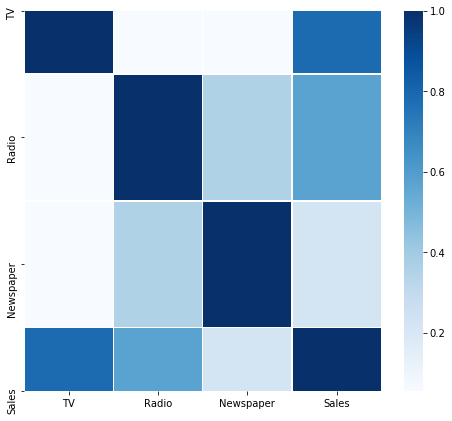

In [19]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr, cmap="Blues",linewidth=0.2, ax=ax)

Sales & Newspapers have a low correlation than when comparing radio & TV

In [20]:
est_mul = smf.ols('Sales ~ TV + Radio + Newspaper', df).fit()
est_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        14:06:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Fitting

In [21]:
est_mul_1 = smf.ols('Sales ~ TV ',df).fit()
est_mul_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        14:06:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observe R Squared is 0.610 for Only TV. Now I'm going to add predictor variables one by one and lets observe the R squared value of how it varies

In [22]:
est_mul_2 = smf.ols('Sales ~ TV + Newspaper',df).fit()
est_mul_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           3.95e-45
Time:                        14:07:00   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Increase in 0.3 percent approx when I added newspaper, now I am going to remove Newspaper & add radio to TV

In [23]:
est_mul_3 = smf.ols('Sales ~ TV + Radio',df).fit()
est_mul_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           4.83e-98
Time:                        14:07:00   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A significant jump. Now lets observe the rest of the combinations

In [24]:
est_mul_4 = smf.ols('Sales ~ Radio',df).fit()
est_mul_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           4.35e-19
Time:                        14:07:00   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
est_mul_4 = smf.ols('Sales ~ Radio + TV',df).fit()
est_mul_4.summary()
print('Standard errors: ', est_mul_4.mse_resid)
print('Residuals: ',est_mul_4.resid)
print(est_mul_4.ssr)
print(est_mul_4.mse_total)

Standard errors:  2.8269745181097377
Residuals:  0      1.544535
1     -1.945362
2     -3.037018
3      0.882884
4     -0.323908
         ...   
195    2.235488
196    1.547625
197    0.031952
198    1.707077
199   -1.757543
Length: 200, dtype: float64
556.9139800676184
27.22185301507538


R squared remains same irrespective of changing the variable positions 

In [26]:
def evaluateModel (model):
  n=len(df)
  RSS=((df.Sales - model.predict())**2).sum()
  print("RSS = ", RSS)
  print("R2 = ", model.rsquared)
  print("RSE = ",np.sqrt((1/(n-2))*RSS))
print('EVALUATION OF RADIO & TV MODEL\n')
evaluateModel(est_mul_4)   #Radio & TV
print('\n')
print('EVALUATION OF RADIO & TV & NEWSPAPER MODEL\n')
evaluateModel(est_mul)     #Radio & TV & Newspaper
print("\n")
print('EVALUATION OF NEWSPAPER & TV MODEL\n')
evaluateModel(est_mul_2)   #TV & Newspaper

EVALUATION OF RADIO & TV MODEL

RSS =  556.9139800676184
R2 =  0.8971942610828956
RSE =  1.6771096771017617


EVALUATION OF RADIO & TV & NEWSPAPER MODEL

RSS =  556.8252629021872
R2 =  0.8972106381789522
RSE =  1.6769760888385674


EVALUATION OF NEWSPAPER & TV MODEL

RSS =  1918.5618118968275
R2 =  0.6458354938293271
RSE =  3.11282927907893


In [27]:
est_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        14:07:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [33]:
est_mul_5=smf.ols('Sales ~ Radio + TV + Radio*TV',df).fit()

print(evaluateModel(est_mul_5))
est_mul_5.summary()

RSS =  174.48338262772717
R2 =  0.9677905498482523
RSE =  0.938738091903456
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):          6.68e-146
Time:                        14:08:25   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio:TV       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p-value of Radio*TV is very low. Hence strong evidence the true relationship is not additive. R^2 is also higher than the previous


Radio*TV --> Interaction  term

#### Note



However, it is sometimes the case that an interaction term has a very small p-value, but the associated main effects (in this case, TV and radio) do not. The hierarchical principle states that if we include an interaction in a model,we hierarchical should also include the main effects, even if the p-values associated with principle
their coefficients are not significant.